# Trading - Signal Generator

### This notebook explains the way to analyse a stock and figure out different techniques that can be used to generate the trading signals

Import the librarries that are required for loading the data, doing the statistical analysis and ploting the results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('INFY.csv',index_col="Date",usecols=['Date','Adj Close'])
df.rename(columns={'Adj Close':'INFY'},inplace=True)

In [3]:
df.dropna(inplace=True)

In [4]:
start_date = '2017-01-01'
end_date='2018-08-31'
dates = pd.date_range(start_date,end_date)


In [5]:
filteredDF = pd.DataFrame(index=dates)

In [6]:
filteredDF = filteredDF.join(df,how="inner")

In [7]:
symbols = ['TCS','WIPRO','MINDTREE']
for symbol in symbols:
    df_temp = pd.read_csv("{}.csv".format(symbol),index_col="Date",usecols=['Date','Adj Close'])
    df_temp.rename(columns={'Adj Close':symbol},inplace=True)
    filteredDF = filteredDF.join(df_temp)

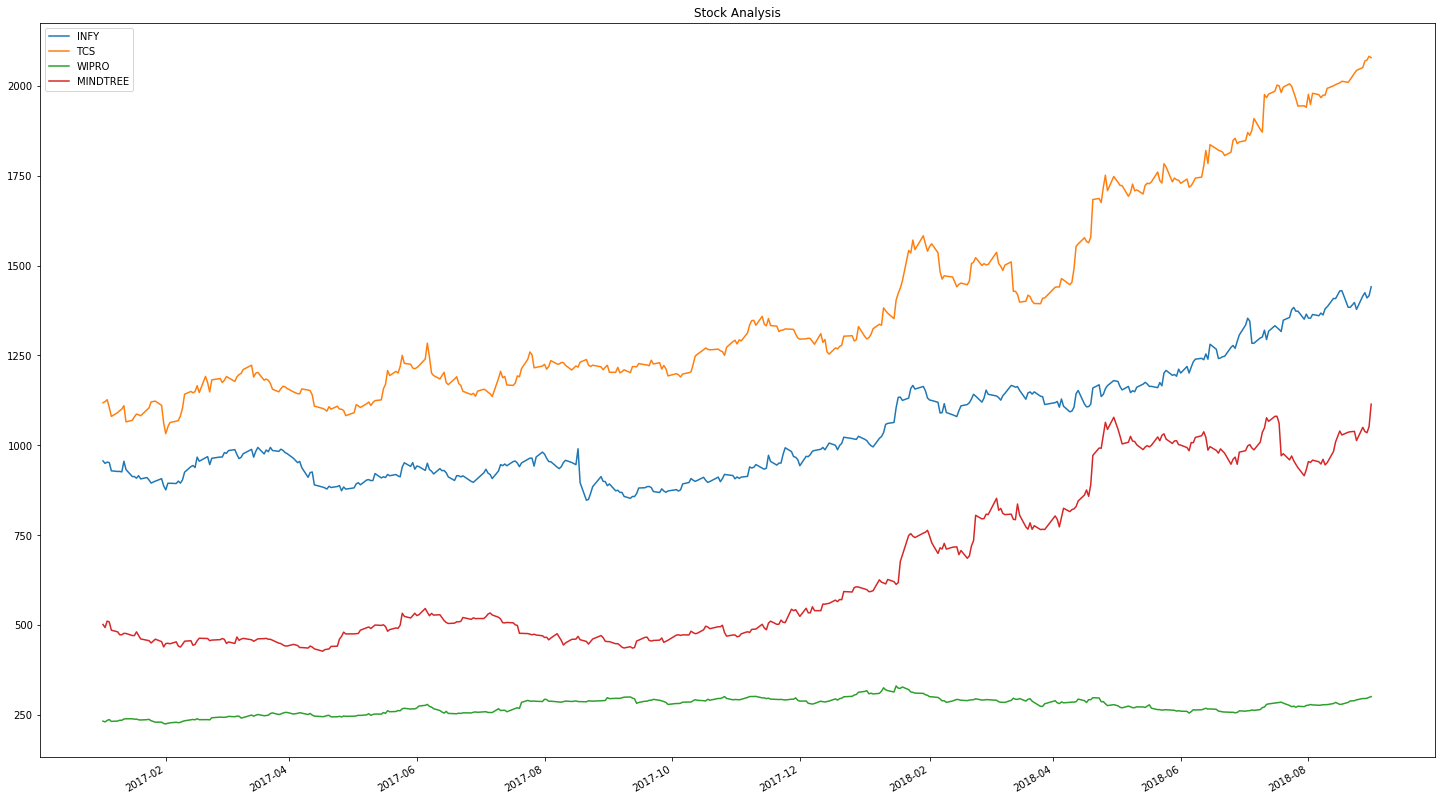

In [8]:
filteredDF.plot(figsize=(25, 15),title="Stock Analysis");

In [9]:
normalizedFilteredDF = filteredDF/filteredDF.iloc[0,:]

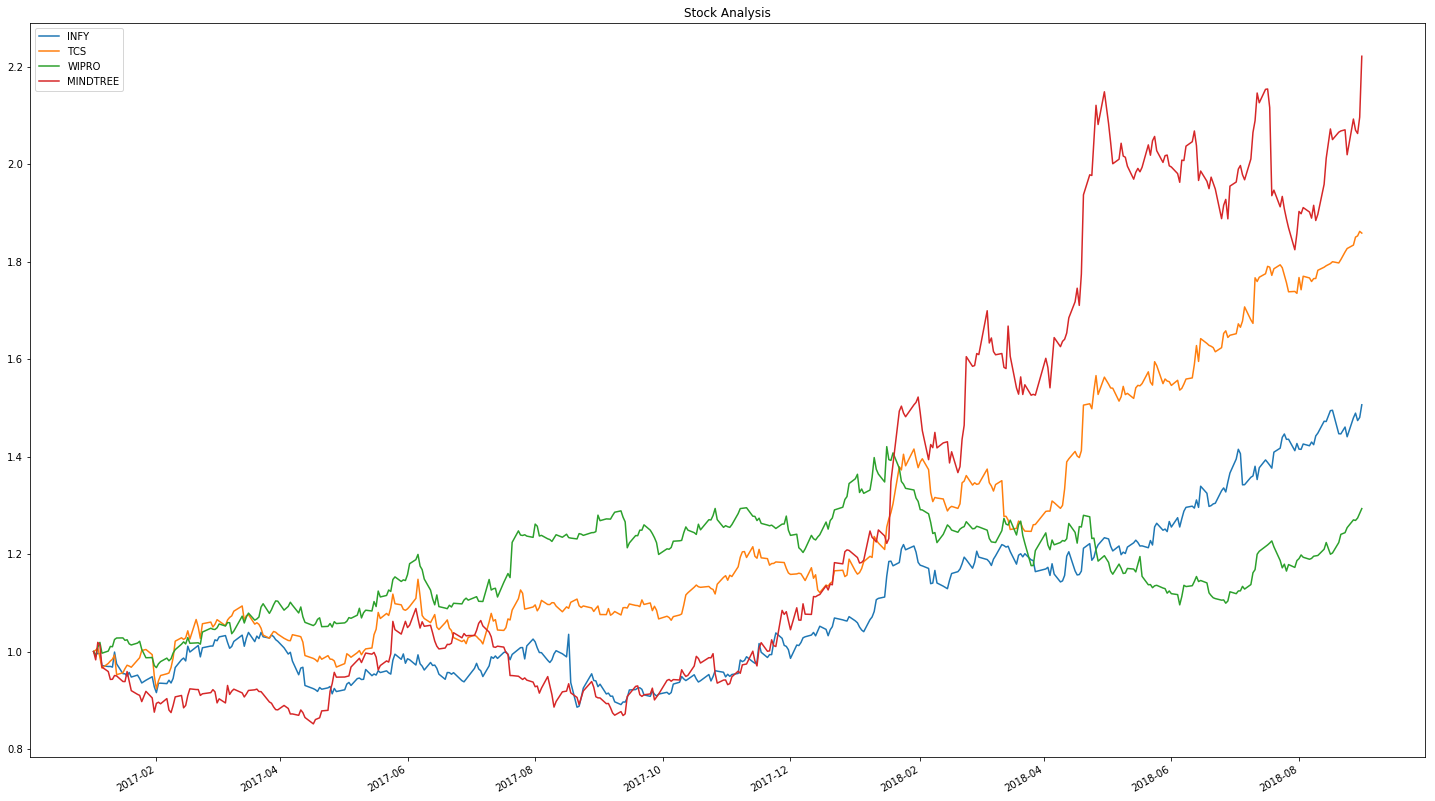

In [10]:
normalizedFilteredDF.plot(figsize=(25, 15),title="Stock Analysis");


In [25]:
symbolToAnalyze = 'MINDTREE'


In [26]:
rmFiltered_short = pd.rolling_mean(filteredDF[symbolToAnalyze],window=30)
rmFiltered_medium = pd.rolling_mean(filteredDF[symbolToAnalyze],window=45)
rmFiltered_long = pd.rolling_mean(filteredDF[symbolToAnalyze],window=60)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=45,center=False).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
rstdFiltered = pd.rolling_std(filteredDF[symbolToAnalyze],window=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  """Entry point for launching an IPython kernel.


In [28]:
upperBoiledBand = rmFiltered + 2*rstdFiltered
lowerBoiledBand = rmFiltered - 2*rstdFiltered

NameError: name 'rmFiltered' is not defined

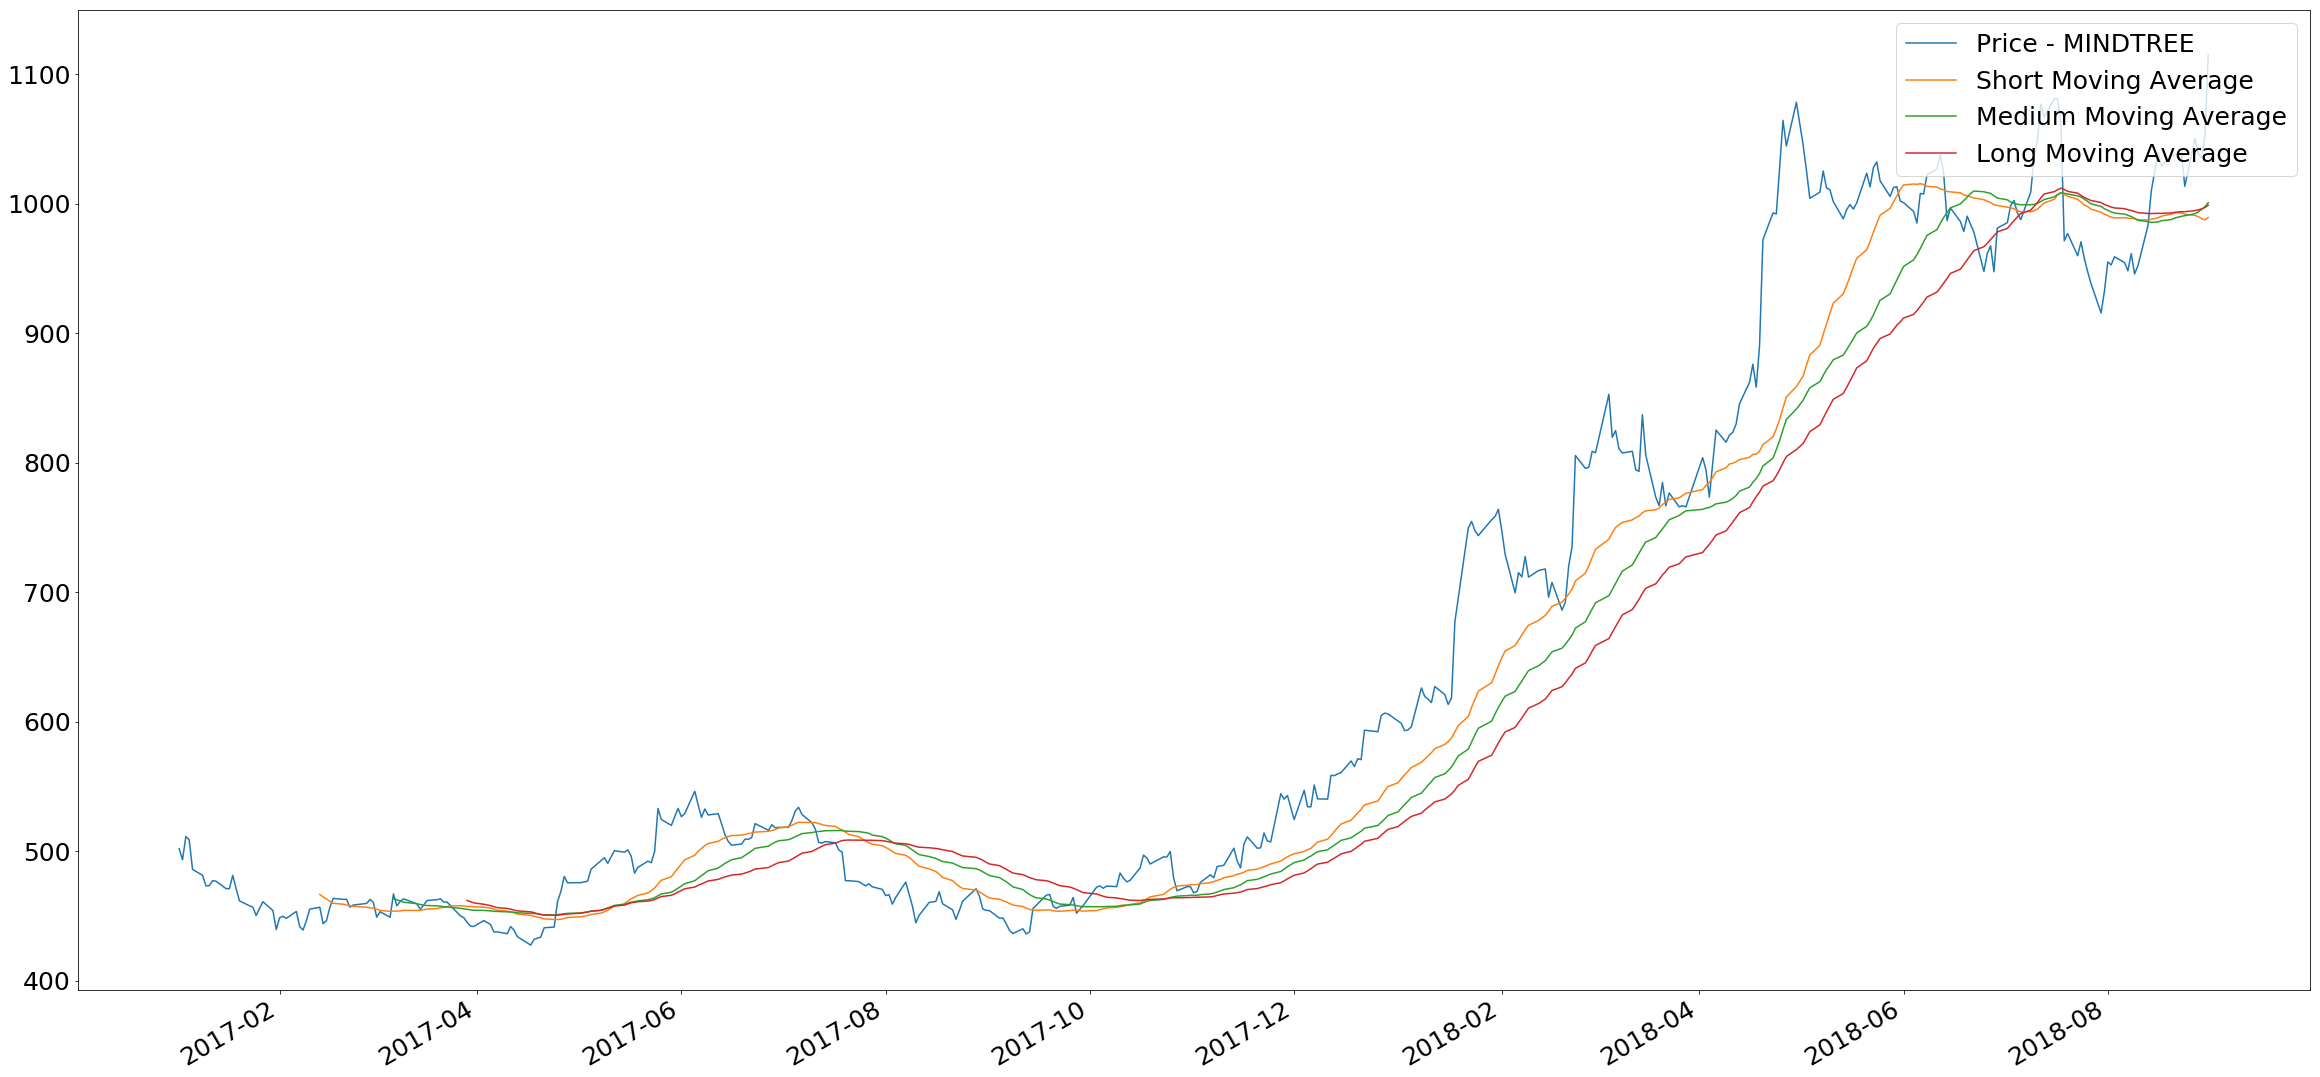

In [29]:
ax = filteredDF[symbolToAnalyze].plot(figsize=(40,20),fontsize=25,label="Price - " + symbolToAnalyze  )
#upperBoiledBand.plot(figsize=(40,20),fontsize=25,label="Upper Band",ax=ax)
#lowerBoiledBand.plot(figsize=(40,20),fontsize=25,label="Lower Band",ax=ax)
rmFiltered_short.plot(figsize=(40,20),fontsize=25,label="Short Moving Average",ax=ax);
rmFiltered_medium.plot(figsize=(40,20),fontsize=25,label="Medium Moving Average",ax=ax);
rmFiltered_long.plot(figsize=(40,20),fontsize=25,label="Long Moving Average",ax=ax);
plt.legend(loc='upper right',fontsize=25)

In [322]:
daily_return = filteredDF.copy()

In [323]:
daily_return[1:] = (daily_return[1:]/daily_return[:-1].values)-1
daily_return[:1] = 0

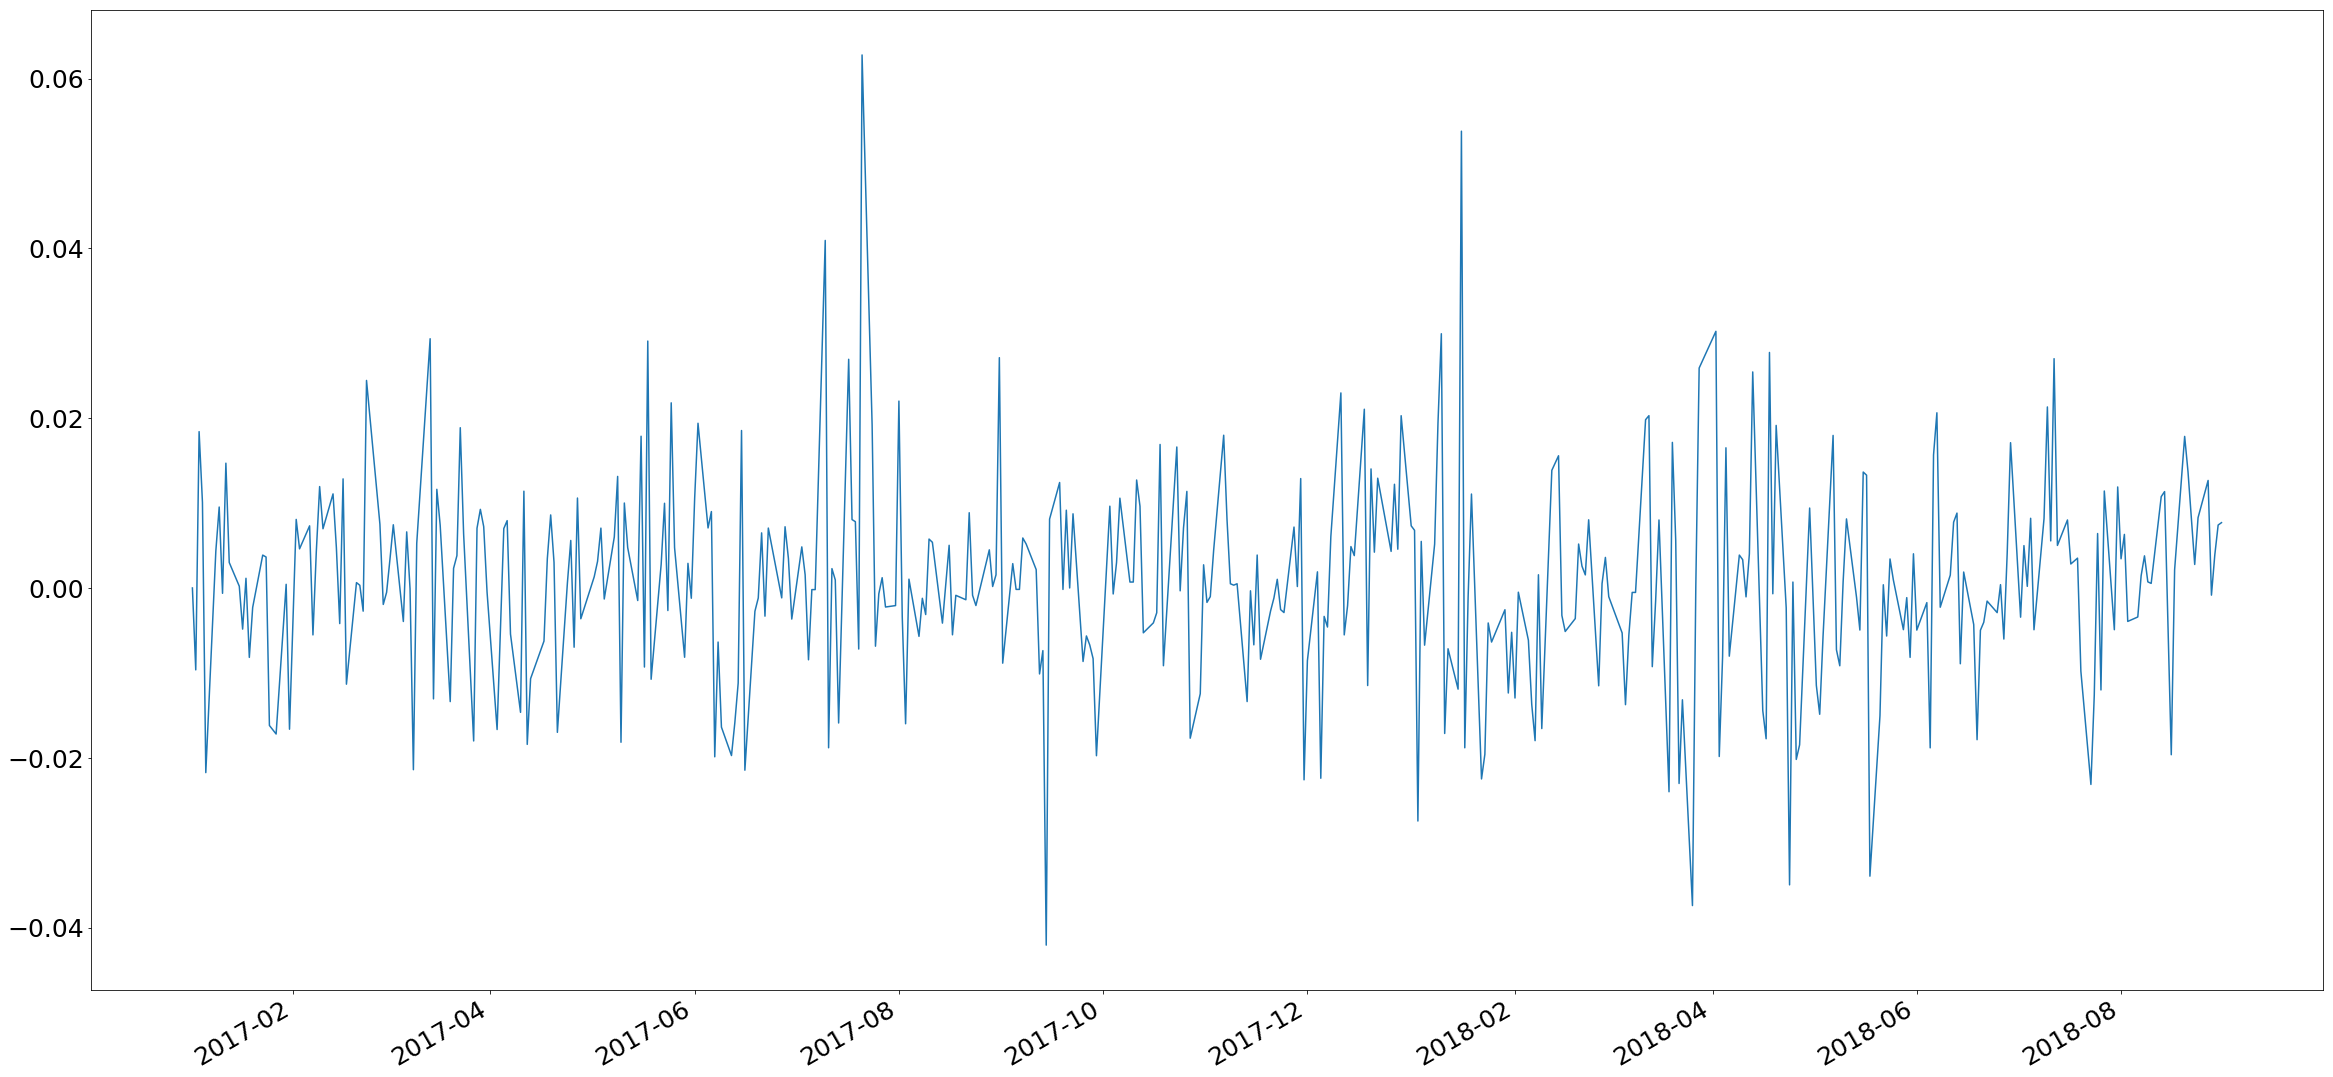

In [352]:
daily_return[symbolToAnalyze].plot(figsize=(40,20),fontsize=25)

INFY        6.007446
TCS         3.092578
WIPRO       2.595032
MINDTREE    4.062791
dtype: float64

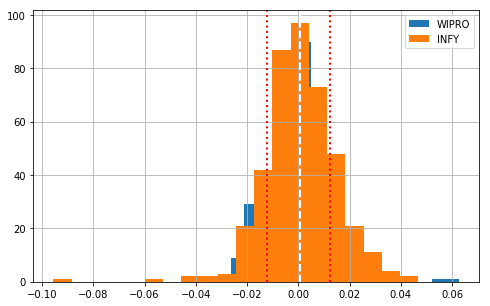

In [364]:
daily_return[symbolToAnalyze].hist(figsize=(8,5), bins=20, label = symbolToAnalyze);
daily_return['INFY'].hist(figsize=(8,5), bins=20, label = 'INFY');
plt.axvline(daily_return[symbolToAnalyze].mean(),color='w',linestyle='dashed',linewidth=2)
plt.axvline(daily_return[symbolToAnalyze].std(),color='r',linestyle='dotted',linewidth=2)
plt.axvline(-daily_return[symbolToAnalyze].std(),color='r',linestyle='dotted',linewidth=2);
plt.legend(loc='upper right')
daily_return.kurtosis()

Kurtosis - Probability in the tails

(0.3040270252406013, 0.0008743143385933419)

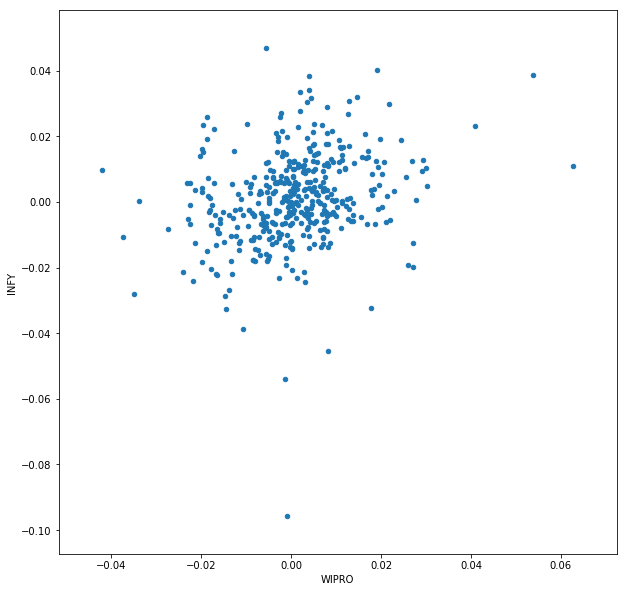

In [388]:
daily_return.plot(kind='scatter',x=symbolToAnalyze,y="INFY",figsize=(10,10));
beta_Infy, alpha_Infy = np.polyfit(daily_return[symbolToAnalyze],daily_return['INFY'],1)

beta_Infy, alpha_Infy

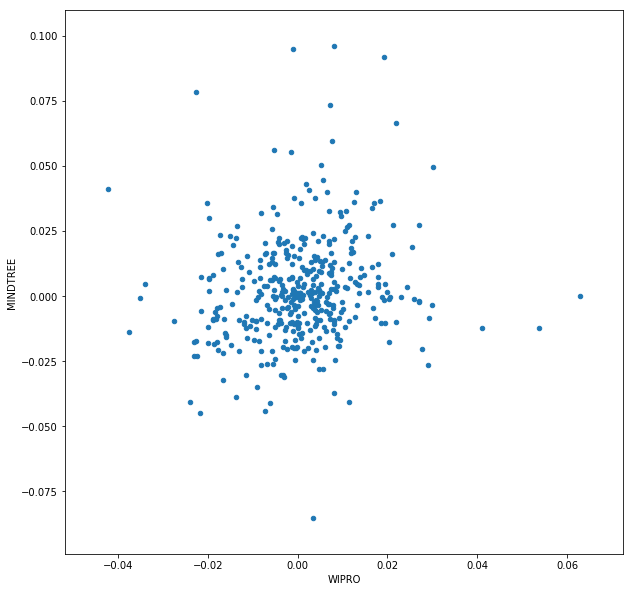

In [380]:
daily_return.plot(kind='scatter',x=symbolToAnalyze,y="MINDTREE",figsize=(10,10));